# Comparación de IA para *drug repurposing* en Alzheimer.
En este notebook se realiza una comparativa entre diferentes alternativas de inteligencia artificial (IA) aplicados a la propuesta de reutilización de fármacos para el tratamiento del Alzheimer. El objetivo de este análisis es contrastar metodologías que puedan identificar fármacos existentes que puedan ser reutilizados de manera efectiva en el tratamiento de esta enfermedad neurodegenerativa.

## Metodología
Replicamos el enfoque utilizado en el artículo *Leveraging generative AI to prioritize drug repurposing candidates for Alzheimer’s disease with real-world clinical validation* (Yan et al., 2024) utilizando los modelos de inteligencia artificial ChatGPT y Gemini. Los prompts fueron extraídos directamente de dicho artículo, y los aplicamos a ambos modelos para realizar la comparativa de candidatos para el repurposing de fármacos en el tratamiento del Alzheimer.

**Prompt 1:**  
"Please provide a list of the 20 most promising drugs for repurposing in the treatment of Alzheimer’s disease based on their potential efficacy, and indicate the diseases they were originally developed to treat. Please use the JSON format to include the “Drug” and “Disease” keys."

**Prompt 2:**  
"Please check if the generated list meets the requirement: 1) exclude the drugs that were originally designed for Alzheimer’s disease, 2) 20 distinct drugs, and 3) in JSON format. If not, please regenerate the list that meets the requirement."

**Cita del artículo:**  
Yan, C., Grabowska, M.E., Dickson, A.L. et al. *Leveraging generative AI to prioritize drug repurposing candidates for Alzheimer’s disease with real-world clinical validation*. npj Digit. Med. 7, 46 (2024). [https://doi.org/10.1038/s41746-024-01038-3](https://doi.org/10.1038/s41746-024-01038-3)

----

Habiendo obtenido las respuestas fuimos guardando en archivos json las respuestas. Debido a la naturaleza probabilística

## Herramientas
### <img width=30% src="imgs/chatgpt.png" alt="ChatGPT">

In [119]:
#| code-fold: true
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

#### Primeras 10 líneas de la tabla obtenida

In [120]:
#| code-fold: true
#| label: tbl-head-gpt
#| tbl-cap: "Primeras 10 líneas de la tabla obtenida de ChatGPT" 
df_chatgpt = pd.DataFrame()

directory = "ChatGPT"
json_files = [f for f in os.listdir(directory) if f.endswith('.json')]

for file in json_files:
    file_path = os.path.join(directory, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        
        df_chatgpt = pd.concat([df_chatgpt, pd.json_normalize(data)], ignore_index=True)

df_chatgpt.head(10)

,Drug,Disease
0,Metformin,Type 2 Diabetes
1,Losartan,Hypertension
2,Simvastatin,Hypercholesterolemia
3,Candesartan,Hypertension
4,Diltiazem,Hypertension and Angina
5,Propranolol,Hypertension and Anxiety
6,Pioglitazone,Type 2 Diabetes
7,Rifampin,Tuberculosis
8,Minocycline,Bacterial Infections
9,Furosemide,Edema and Hypertension


La tabla muestra una lista de 10 fármacos con su respectiva enfermedad original para la cual fueron desarrollados. Cada fila incluye el nombre del fármaco y la enfermedad específica que se buscaba tratar al momento de su desarrollo. 

#### Descripción

In [121]:
#| code-fold: true
#| label: tbl-desc-gpt
#| tbl-cap: "Descripción del set de datos de ChatGPT" 
df_chatgpt.describe()

,Drug,Disease
count,100,100
unique,60,47
top,Metformin,Type 2 Diabetes
freq,5,12


Podemos ver que de las 100 drogas que propuso ChatGPT 60 son úinicas y refieren a 47 enfermedades diferentes. 

La droga más frecuente es metformina y el la enfermedad que tratan más frecuentemente es diabetes de tipo 2.

#### Barplot

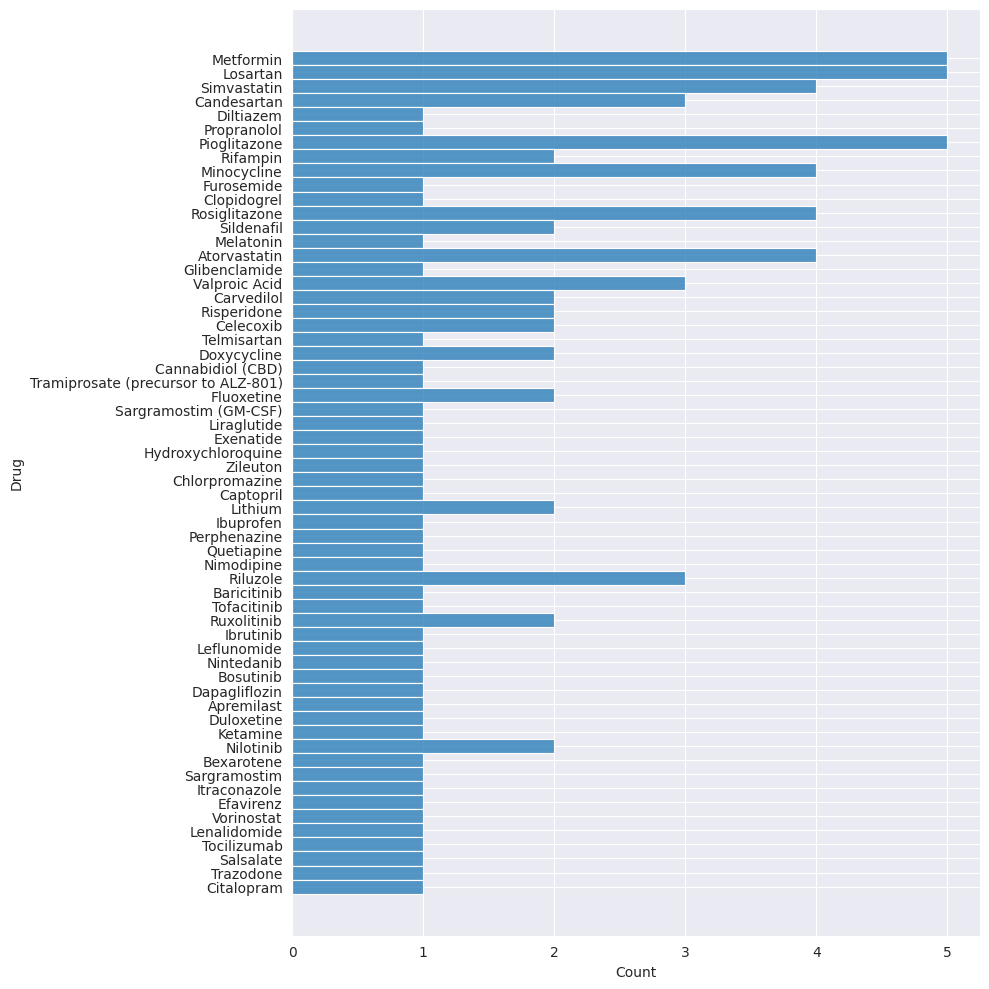

In [122]:
#| code-fold: true
#| label: fig-barplot-chatgpt
#| fig-cap: "Frecuencia de cada droga en ChatGPT"
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.histplot(df_chatgpt, y="Drug",)
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### <img width=30% src="imgs/gemini.png" alt="Gemini">
#### Primeras 10 líneas de la tabla obtenida

In [123]:
#| code-fold: true
#| label: tbl-head-gemini
#| tbl-cap: "Primeras 10 líneas de la tabla obtenida de Gemini" 
df_gemini = pd.DataFrame()

directory = "Gemini"
json_files = [f for f in os.listdir(directory) if f.endswith('.json')]

for file in json_files:
    file_path = os.path.join(directory, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        
        df_gemini = pd.concat([df_gemini, pd.json_normalize(data)], ignore_index=True)

df_gemini.head(10)

,Drug,Disease
0,Bevacizumab,Cancer
1,Simvastatin,Hypercholesterolemia
2,Metformin,Type 2 Diabetes
3,Fluoxetine,Depression
4,Lithium,Bipolar Disorder
5,Minocycline,Acne
6,Ibuprofen,Pain and Inflammation
7,Celecoxib,Osteoarthritis
8,Rapamycin,Organ Transplant Rejection
9,Exenatide,Type 2 Diabetes


#### Descripción

In [124]:
#| code-fold: true
#| label: tbl-desc-gemini
#| tbl-cap: "Descripción del set de datos de Gemini" 
df_gemini.describe()

,Drug,Disease
count,100,100
unique,30,20
top,Bevacizumab,Alzheimer's Disease
freq,5,16


Podemos ver que de las 100 drogas que propuso Gemini 30 son úinicas y refieren a 20 enfermedades diferentes. 

Esto nos da indicios de que es mucho menor la variabilidad de Gemini respecto a ChatGPT.

La droga más frecuente es metformina y el la enfermedad que tratan más frecuentemente es diabetes de tipo 2.

#### Barplot

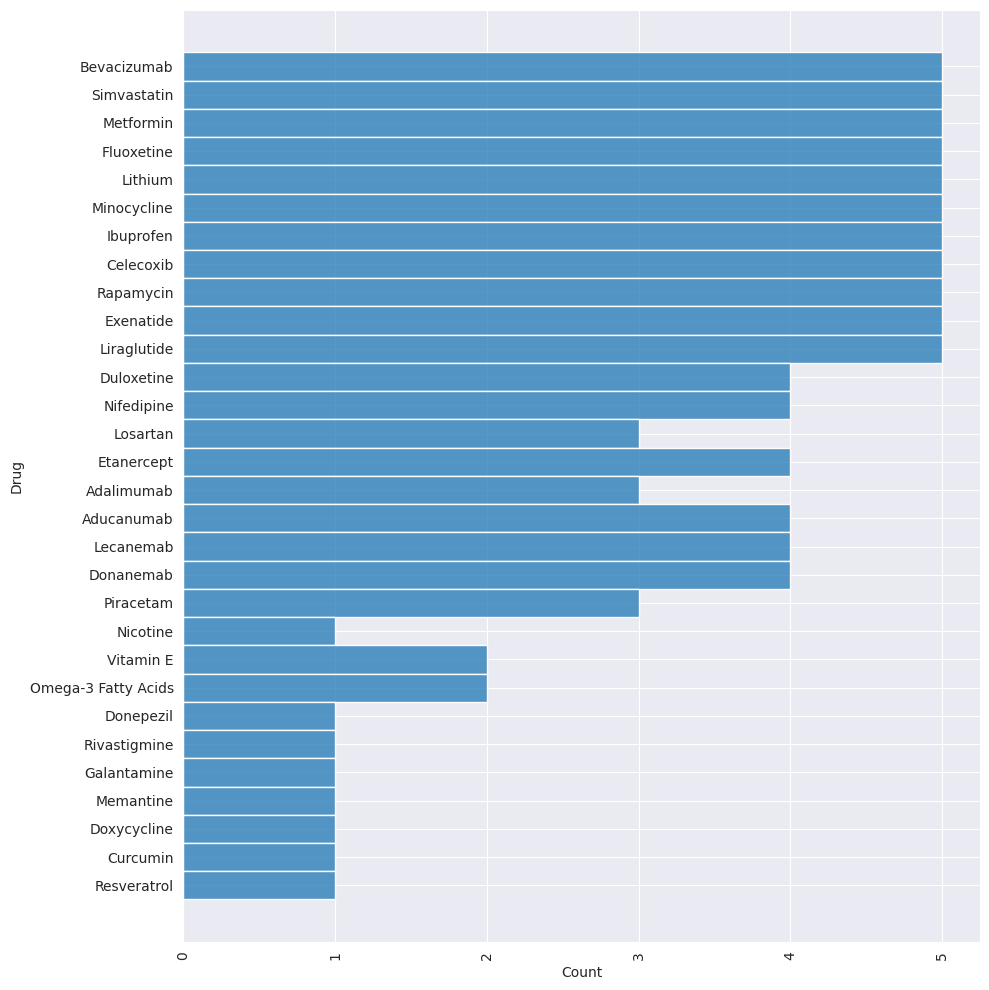

In [125]:
#| code-fold: true
#| label: fig-barplot-gemini
#| fig-cap: "Frecuencia de cada droga en Gemini"
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.histplot(df_gemini, y="Drug",)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### TxGNN: Redes Neuronales de Grafos para Reutilización de Fármacos

Es una propuesta de la división de Inteligencia Artificial para la Medicina y la Ciencia de Harvard que presetna un modelo para identificar oportunidades terapéuticas para enfermedades raras. 

Fue pre entrenado con un grafo de conocimiento de 17.080 enfermedades y 7.957 candidatos terapéuticos.

Además desarrollaron una 


**Citas:** 

- Huang, K., Chandak, P., Wang, Q. et al. A foundation model for clinician-centered drug repurposing. Nat Med (2024). https://doi.org/10.1038/s41591-024-03233-x
- Q. Wang, K. Huang, P. Chandak, M. Zitnik and N. Gehlenborg, "Extending the Nested Model for User-Centric XAI: A Design Study on GNN-based Drug Repurposing," in *IEEE Transactions on Visualization and Computer Graphics*, vol. 29, no. 1, pp. 1266-1276, Jan. 2023, doi: [10.1109/TVCG.2022.3209435](https://doi.org/10.1109/TVCG.2022.3209435).

In [126]:
#| code-fold: true
#| label: tbl-txgnn
#| tbl-cap: "Primeras 20 drogas propuestas por TxGNN" 
df_txgnn = pd.read_csv("txgnn.csv")
df_txgnn

,Drug
0,Tacrine
1,Rivastigmine
2,Acetylcarnitine
3,Galantamine
4,Epicriptine
5,Ipidacrine
6,Donepezil
7,Pramiracetam
8,Nifurtimox
9,Deutetrabenazine


### Intersección de las 3 herramientas
A continuación se presenta el número de drogas que comparten los diferentes sets de datos obtenidos por cada herramienta.

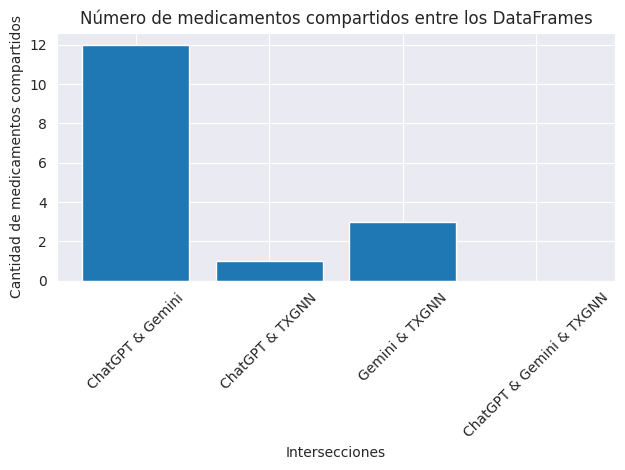

In [127]:
#| code-fold: true
#| label: fig-intersecciones
#| fig-cap: "Número de drogas compartidas entre set de datos"
from collections import Counter

set_chatgpt = set(df_chatgpt['Drug'])
set_gemini = set(df_gemini['Drug'])
set_txgnn = set(df_txgnn['Drug'])

intersection_chatgpt_gemini = len(set_chatgpt & set_gemini)
intersection_chatgpt_txgnn = len(set_chatgpt & set_txgnn)
intersection_gemini_txgnn = len(set_gemini & set_txgnn)
intersection_all = len(set_chatgpt & set_gemini & set_txgnn)

intersections = Counter({
    'ChatGPT & Gemini': intersection_chatgpt_gemini,
    'ChatGPT & TXGNN': intersection_chatgpt_txgnn,
    'Gemini & TXGNN': intersection_gemini_txgnn,
    'ChatGPT & Gemini & TXGNN': intersection_all
})

labels = list(intersections.keys())
values = list(intersections.values())

plt.bar(labels, values)
plt.title('Número de medicamentos compartidos entre los DataFrames')
plt.xlabel('Intersecciones')
plt.ylabel('Cantidad de medicamentos compartidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [128]:
#| code-fold: true
intersection_chatgpt_gemini = set_chatgpt & set_gemini
intersection_chatgpt_txgnn = set_chatgpt & set_txgnn
intersection_gemini_txgnn = set_gemini & set_txgnn
intersection_all = set_chatgpt & set_gemini & set_txgnn

def create_wordcloud(intersection):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                        max_font_size=100, min_font_size=10).generate(' '.join(intersection))
    

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.show()

#### Nube de Palabras - ChatGPT & Gemini


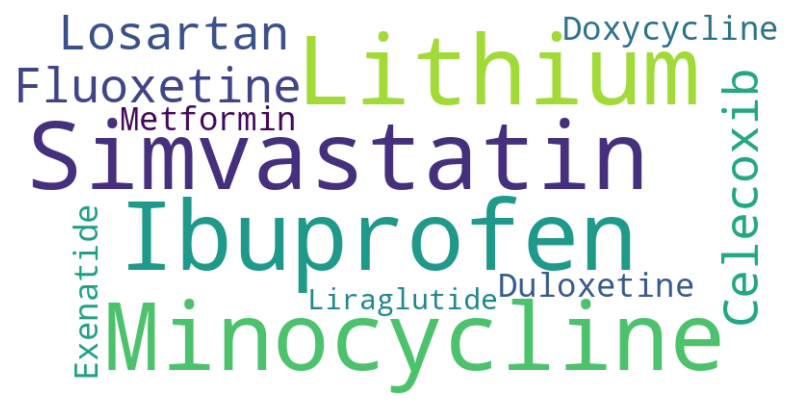

In [129]:
#| code-fold: true
#| label: fig-interseccion-gpt-gem
#| fig-cap: "Drogas compartidas por ChatGPT y Gemini"
create_wordcloud(intersection_chatgpt_gemini)

#### Nube de Palabras - ChatGPT & TxGNN

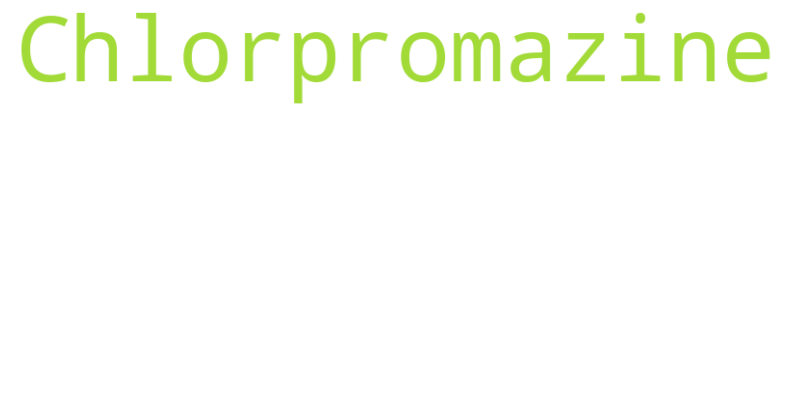

In [130]:
#| code-fold: true
#| label: fig-interseccion-gpt-txgnn
#| fig-cap: "Drogas compartidas por ChatGPT y TxGNN"
create_wordcloud(intersection_chatgpt_txgnn)

#### Nube de Palabras - Gemini & TxGNN

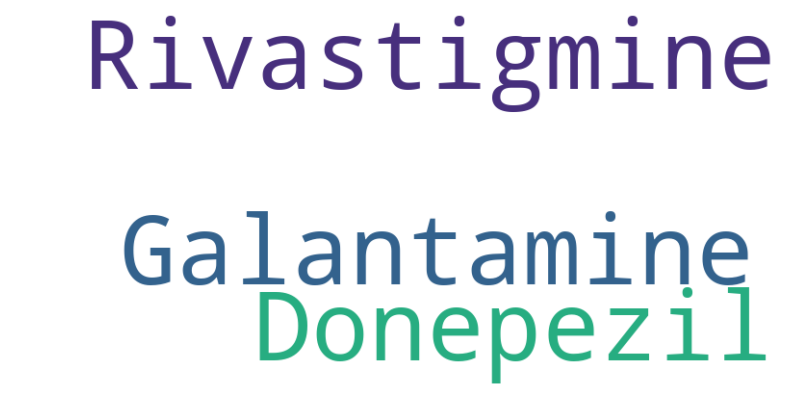

In [131]:
#| code-fold: true
#| label: fig-interseccion-txgnn-gem
#| fig-cap: "Drogas compartidas por TxGNN y Gemini"
create_wordcloud(intersection_gemini_txgnn)